In [383]:
import pandas as pd
import json
import datetime
from pandas.io.json import json_normalize

In [384]:
data = []
with open("/Users/Antonio/Downloads/yelp_dataset/yelp_academic_dataset_business.json", "r", encoding = "UTF-8") as f:
    for line in f:
        data.append(json.loads(line))

df = json_normalize(data)

In [385]:
cols = df.columns
df.columns

Index(['address', 'attributes.AcceptsInsurance', 'attributes.AgesAllowed',
       'attributes.Alcohol', 'attributes.Ambience', 'attributes.BYOB',
       'attributes.BYOBCorkage', 'attributes.BestNights',
       'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
       'attributes.ByAppointmentOnly', 'attributes.Caters',
       'attributes.CoatCheck', 'attributes.Corkage',
       'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForDancing',
       'attributes.GoodForKids', 'attributes.GoodForMeal',
       'attributes.HairSpecializesIn', 'attributes.HappyHour',
       'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel',
       'attributes.Open24Hours', 'attributes.OutdoorSeating',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
       'attributes.RestaurantsDelivery', 'attributes.RestaurantsGoodForGr

In [386]:
df.drop(['attributes.AcceptsInsurance', 'attributes.AgesAllowed','attributes.Alcohol', 'attributes.Ambience', 'attributes.BYOB', 
         'attributes.BYOBCorkage', 'attributes.BestNights', 'attributes.BikeParking','attributes.BusinessAcceptsBitcoin',
        'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking','attributes.ByAppointmentOnly', 
         'attributes.Caters','attributes.CoatCheck', 'attributes.Corkage','attributes.DietaryRestrictions', 
         'attributes.DogsAllowed','attributes.DriveThru', 'attributes.GoodForDancing','attributes.GoodForKids', 
         'attributes.GoodForMeal','attributes.HairSpecializesIn', 'attributes.HappyHour','attributes.HasTV',
         'attributes.Music', 'attributes.NoiseLevel','attributes.Open24Hours', 'attributes.OutdoorSeating', 
         'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService','attributes.RestaurantsDelivery', 
         'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsReservations',
         'attributes.RestaurantsTableService', 'attributes.RestaurantsTakeOut', 'attributes.Smoking',
         'attributes.WheelchairAccessible','attributes.WiFi','hours.Friday',
         'hours.Monday', 'hours.Saturday', 'hours.Sunday', 'hours.Thursday','hours.Tuesday', 'hours.Wednesday', 
         'is_open'], inplace = True, axis = 1)

# 'attributes.RestaurantsPriceRange2' <--ethical concern, descriptive 

In [42]:
df['state'].value_counts()

AZ     56495
NV     35688
ON     32393
NC     14359
OH     13664
PA     10966
QC      8756
AB      7670
WI      5042
IL      1937
SC       770
NYK      163
NI       134
IN       101
OR        72
BY        60
ST        45
CO        43
C         34
HE        32
NLK       23
XGM       23
NY        19
RP        19
01        11
CA         8
VS         7
NW         4
O          3
6          3
       ...  
AL         2
CC         1
SP         1
MT         1
XMS        1
WAR        1
FL         1
BC         1
TAM        1
45         1
KY         1
PO         1
RCC        1
LU         1
HH         1
MA         1
GA         1
NE         1
DE         1
AG         1
10         1
CRF        1
CS         1
MN         1
HU         1
V          1
VA         1
WHT        1
4          1
11         1
Name: state, Length: 69, dtype: int64

In [387]:
lv_zip = [89044, 89054, 89101, 89102, 89103, 89104, 89106, 89107,
          89108, 89109, 89110, 89113, 89115, 89117, 89118, 89119, 89120, 
          89121, 89122, 89123, 89124, 89128, 89129, 89130, 89131, 89134, 
          89135, 89138, 89139, 89141, 89142, 89143, 89144, 89145, 89146, 89147, 
          89148, 89149, 89156, 89158, 89161, 89165, 89166, 89169, 89178, 89179, 89183, 89199]
lv_zip = [str(i) for i in lv_zip]
lv = df[df.postal_code.isin(lv_zip)]



In [388]:
lv_rest = pd.read_csv('~/Downloads/Restaurant_Inspections.csv')
lv_rest.columns = [str.lower(i) for i in lv_rest.columns]

In [389]:
lv_rest.replace(regex = r'(?<=\d{5})-\d+', value = '', inplace = True)

In [390]:
lv_rest = lv_rest.dropna(subset = ['zip', 'address','restaurant name'])

lv_rest.zip.unique()

array(['89109', '89122', '89104', '89123', '89149', '89129', '89101',
       '89183', '89169', '89052', '89119', '89108', '89102', '89014',
       '89121', '89130', '89110', '89106', '89147', '89012', '89103',
       '89005', '89148', '89128', '89030', '89107', '89032', '89117',
       '89019', '89139', '89158', '89145', '89031', '89156', '89143',
       '89081', '89142', '89084', '89115', '89135', '89178', '89131',
       '89029', '89074', '89044', '89146', '89015', '89166', '89027',
       '89134', '89141', '89113', '89118', '89048', '89111', '89004',
       '89046', '89007', '89011', '89002', '89114', '89120', '89154',
       '91301', '89021', '89144', '89138', '89127', '89124', '89193',
       '89152', '89054', '98147', '89105', '89179', '89041', '89040',
       '85027', '89137', '89112', '89018', '89100', '89006', '89190',
       '89186', '89034', '89189', '89036', '89010', '98032', '89025',
       '89086', '89161', '89165', '89039', '89140', '88108', '89001',
       '80919', '891

In [140]:
lv_rest.iloc[436,:]

serial number                             DAFRGRSNW
permit number                             PR0102800
restaurant name        TROP MINI MART ICE PACKAGING
location name                        TROP MINI MART
category name                             Snack Bar
address                        5785 W TROPICANA 1/2
city                                      Las Vegas
state                                        Nevada
zip                                           89104
current demerits                                  3
current grade                                     A
date current                 04/04/2018 12:00:00 AM
inspection date              03/19/2018 12:00:00 AM
inspection time              03/19/2018 10:00:00 AM
employee id                               EE7001291
inspection type                  Routine Inspection
inspection demerits                               3
inspection grade                                  B
permit status                                   NaN
inspection r

In [108]:
lv_rest.iloc[1196,:]

serial number                          DAIZGXETD
permit number                          PR0107683
restaurant name                      OUTBACK BAR
location name            OUTBACK STEAKHOUSE 3213
category name                       Bar / Tavern
address                       521 N STEPHANIE St
city                                   Henderson
state                                     Nevada
zip                                        89014
current demerits                               0
current grade                                  A
date current              03/01/2017 12:00:00 AM
inspection date           03/01/2017 12:00:00 AM
inspection time           03/01/2017 12:50:00 PM
employee id                            EE7001226
inspection type               Routine Inspection
inspection demerits                            0
inspection grade                               A
permit status                                  A
inspection result                      'A' Grade
violations          

In [398]:
lv_rest.loc[:,'address'] = lv_rest.apply(lambda row: str.lower(str(row['address'])).replace(' ', ''), axis = 1)
lv_rest.loc[:,'restaurant name']= lv_rest.apply(lambda row: str.lower(row['restaurant name']).replace(' ', ''), axis = 1)

In [397]:
lv_rest.columns

Index(['serial number', 'permit number', 'restaurant name', 'location name',
       'category name', 'address', 'city', 'state', 'zip', 'current demerits',
       'current grade', 'date current', 'inspection date', 'inspection time',
       'employee id', 'inspection type', 'inspection demerits',
       'inspection grade', 'permit status', 'inspection result', 'violations',
       'record updated', 'location 1'],
      dtype='object')

In [392]:
lv.loc[:,'address'] = lv.apply(lambda row: str.lower(str(row['address'])).replace(' ', ''), axis = 1)
lv.loc[:,'name'] = lv.apply(lambda row: str.lower(row['name']).replace(' ', ''), axis = 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [67]:
lv_rest.columns

Index(['serial number', 'permit number', 'restaurant name', 'location name',
       'category name', 'address', 'city', 'state', 'zip', 'current demerits',
       'current grade', 'date current', 'inspection date', 'inspection time',
       'employee id', 'inspection type', 'inspection demerits',
       'inspection grade', 'permit status', 'inspection result', 'violations',
       'record updated', 'location 1'],
      dtype='object')

In [401]:
merged = lv_rest.merge(lv, left_on = ['address','restaurant name'] , right_on =['address','name'], how = 'left')
merged.columns

Index(['serial number', 'permit number', 'restaurant name', 'location name',
       'category name', 'address', 'city_x', 'state_x', 'zip',
       'current demerits', 'current grade', 'date current', 'inspection date',
       'inspection time', 'employee id', 'inspection type',
       'inspection demerits', 'inspection grade', 'permit status',
       'inspection result', 'violations', 'record updated', 'location 1',
       'attributes.RestaurantsPriceRange2', 'business_id', 'categories',
       'city_y', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state_y'],
      dtype='object')

In [402]:
merged = merged[merged['name'].notnull()]

In [403]:
merged.to_csv('sanity_check.csv', index = False)

In [31]:
rev = []
with open("/Users/Antonio/Downloads/yelp_dataset/yelp_academic_dataset_review.json", "r", encoding = "UTF-8") as f:
    for line in f:
        rev.append(json.loads(line))

yelp_reviews = json_normalize(rev)

In [22]:
bus_id = merged.business_id.unique()
yelp_reviews = yelp_reviews[yelp_reviews.business_id.isin(bus_id)]


In [404]:
yelp_reviews.to_csv('vegas_yelp_reviews.csv', index = False)

NameError: name 'yelp_reviews' is not defined

# READ DATA FROM HERE

In [353]:
import pandas as pd
import datetime 
rest_grades = pd.read_csv('sanity_check.csv')
rest_grades.drop(['stars'], axis = 1, inplace = True)
rest_grades['inspection date'] = pd.to_datetime(rest_grades['inspection date'].apply(lambda x:str(x).split()[0]), 
                                                format='%m/%d/%Y')
rest_grades['inspection date'] = rest_grades['inspection date'].apply(lambda x:datetime.datetime(x.year,x.month,1))

In [354]:
yelp_rev = pd.read_csv('vegas_yelp_reviews.csv')

In [355]:
yelp_rev['date'] = pd.to_datetime(yelp_rev['date'],format='%Y-%m-%d')
yelp_rev['date'] = yelp_rev['date'].apply(lambda x:datetime.datetime(x.year,x.month,1))
yelp_rev['date']
new_merged = rest_grades.merge(yelp_rev, left_on = ['business_id','inspection date'] , right_on =['business_id','date'], how = 'left')
new_merged = new_merged[new_merged['inspection grade'].isin(['A', 'B', 'C'])]
new_merged = new_merged.dropna(subset = ['text'])

In [356]:
new_merged['inspection grade'].value_counts()

A    5916
B    1283
C     744
Name: inspection grade, dtype: int64

In [357]:
new_merged.columns

Index(['serial number', 'permit number', 'restaurant name', 'location name',
       'category name', 'address', 'city_x', 'state_x', 'zip',
       'current demerits', 'current grade', 'date current', 'inspection date',
       'inspection time', 'employee id', 'inspection type',
       'inspection demerits', 'inspection grade', 'permit status',
       'inspection result', 'violations', 'record updated', 'location 1',
       'business_id', 'categories', 'city_y', 'latitude', 'longitude', 'name',
       'neighborhood', 'postal_code', 'review_count', 'state_y', 'cool',
       'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id'],
      dtype='object')

# DATA LEAKAGE CAUSED BY PERMIT STATUS, zip
permit status is the same as inspection grade, zip, and review_count

In [358]:
# removed 'inspection_date', 'review_id', 'inspection_time', 'inspection grade', 
# and 'business_id' from drop_list as we use it in get_max_rows() function later
drop_list = ['serial number', 'permit number', 'restaurant name', 'location name',
       'address', 'city_x', 'state_x',
       'current demerits', 'current grade', 'date current', 'employee id', 
       'inspection result', 'record updated', 'location 1',
       'city_y',  'name','postal_code',  'state_y','date', 
       'user_id','inspection demerits', 'permit status',
        'review_count','longitude', 'latitude', 'zip', 'neighborhood']

In [359]:
x_train, x_test, y_train, y_test = train_test_split(new_merged.drop(drop_list, axis = 1),\
                                                    new_merged['inspection grade'], test_size=0.25, random_state=42)


In [360]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Antonio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [361]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [362]:
processed_docs = x_train['text'].map(preprocess)


In [363]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 advic
1 afternoon
2 ahead
3 benefit
4 call
5 calori
6 capriotti
7 cell
8 chain
9 charg
10 cold


In [364]:
dictionary.filter_extremes(no_below=15, no_above=0.75, keep_n=100000)

In [365]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break


[(0, 0.09719184380221453),
 (1, 0.07469097515937903),
 (2, 0.23788912552694463),
 (3, 0.09719184380221453),
 (4, 0.05638344961820625),
 (5, 0.08669945760018967),
 (6, 0.196394989609889),
 (7, 0.07257045457896993),
 (8, 0.06021050084605146),
 (9, 0.05334518311598868),
 (10, 0.01866987261998811),
 (11, 0.06900215232604334),
 (12, 0.05214067471003404),
 (13, 0.059491396742353486),
 (14, 0.07832980113151997),
 (15, 0.08951777021966449),
 (16, 0.06652169581015487),
 (17, 0.08833239740199511),
 (18, 0.09368661448176079),
 (19, 0.06409679675862266),
 (20, 0.07371491945665869),
 (21, 0.010872303966812696),
 (22, 0.09719184380221453),
 (23, 0.09375145099348506),
 (24, 0.029327843461880065),
 (25, 0.06991885855130249),
 (26, 0.06813346373766915),
 (27, 0.08886633374469065),
 (28, 0.0981974948049445),
 (29, 0.10836761692831132),
 (30, 0.05630030076613858),
 (31, 0.02061616943996086),
 (32, 0.034777772854094446),
 (33, 0.08218857727700596),
 (34, 0.05697746259400177),
 (35, 0.0383551421535738),
 (

In [366]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [367]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"taco" + 0.007*"place" + 0.006*"food" + 0.006*"great" + 0.006*"good" + 0.006*"thai" + 0.005*"amaz" + 0.005*"vega" + 0.005*"order" + 0.005*"time"
Topic: 1 
Words: 0.007*"food" + 0.006*"great" + 0.006*"place" + 0.006*"good" + 0.005*"servic" + 0.005*"pizza" + 0.005*"order" + 0.005*"friend" + 0.005*"come" + 0.005*"time"
Topic: 2 
Words: 0.008*"taco" + 0.007*"great" + 0.006*"good" + 0.006*"food" + 0.006*"place" + 0.006*"chicken" + 0.006*"wait" + 0.005*"love" + 0.005*"order" + 0.005*"delici"
Topic: 3 
Words: 0.007*"order" + 0.006*"great" + 0.006*"good" + 0.006*"food" + 0.006*"thai" + 0.005*"come" + 0.005*"like" + 0.005*"servic" + 0.005*"place" + 0.005*"time"
Topic: 4 
Words: 0.007*"great" + 0.007*"food" + 0.006*"best" + 0.006*"place" + 0.006*"come" + 0.006*"servic" + 0.006*"good" + 0.006*"love" + 0.005*"restaur" + 0.005*"price"
Topic: 5 
Words: 0.005*"good" + 0.005*"order" + 0.005*"place" + 0.005*"locat" + 0.005*"come" + 0.005*"great" + 0.005*"food" + 0.005*"time" + 0.

In [368]:
x_train.loc[:,'topics'] = x_train.\
apply(lambda row: max(lda_model_tfidf[dictionary.doc2bow(preprocess(row['text']))],\
                      key = lambda item:item[1])[0], axis = 1)

In [369]:
x_test.loc[:,'topics'] = x_test.\
apply(lambda row: max(lda_model_tfidf[dictionary.doc2bow(preprocess(row['text']))],\
                      key = lambda item:item[1])[0], axis = 1)

In [370]:
def get_max_rows(df, gp, max_feat):
    B_maxes = df.groupby(gp)[max_feat].transform(max)
    return df[df[max_feat] == B_maxes] 

latest = get_max_rows(x_train, ['business_id', 'inspection date'], 'inspection time')
final = get_max_rows(latest, ['business_id', 'inspection date'], 'review_id')

In [382]:
print(latest.shape)
print(final.shape)
print(new_merged.shape)
print(x_test.shape)

(4896, 15)
(1511, 15)
(7943, 41)
(1986, 15)


In [372]:
final.columns

Index(['category name', 'inspection date', 'inspection time',
       'inspection type', 'inspection grade', 'violations', 'business_id',
       'categories', 'cool', 'funny', 'review_id', 'stars', 'text', 'useful',
       'topics'],
      dtype='object')

In [373]:
final['inspection type'] = pd.factorize(final['inspection type'])[0]
# final['neighborhood'] = pd.factorize(final['neighborhood'])[0]
final['category name'] = pd.factorize(final['category name'])[0]
final['inspection grade'] = pd.factorize(final['inspection grade'])[0]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [374]:
# for i in first_model.columns:
#     print(i)
#     print(type(first_model[i][0]))
    

In [375]:
final.columns

Index(['category name', 'inspection date', 'inspection time',
       'inspection type', 'inspection grade', 'violations', 'business_id',
       'categories', 'cool', 'funny', 'review_id', 'stars', 'text', 'useful',
       'topics'],
      dtype='object')

In [376]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# first_model = first_model[first_model['inspection grade'].isin([0,1,2])]

model_drop = ['inspection date', 'review_id', 'inspection time',\
              'inspection grade', 'business_id', 'text', 'categories','violations']
major_1 = final[final['inspection grade'] == 0 ]
minority_1= final[final['inspection grade'] ==  1]
minority_2 = final[final['inspection grade'] ==2]

min1_up = resample(minority_1, replace=True, n_samples=1324, random_state=123)
min2_up = resample(minority_2, replace=True, n_samples=1324, random_state=124)
first_model = pd.concat([major_1, min1_up, min2_up])


# first_model = get_max_rows(first_model,['inspection date'],'stars_y')
# x_train, x_test, y_train, y_test = train_test_split(first_model.drop(model_drop, axis = 1), first_model['inspection grade'], test_size=0.25, random_state=42)

clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(first_model.drop(model_drop,axis =1), first_model['inspection grade'])

# LOOK AT CORRELATION BTWN REVIEW_COUNTS + INSPECTION GRADE

In [377]:
latest2 = get_max_rows(x_test, ['business_id', 'inspection date'], 'inspection time')
final2 = get_max_rows(latest2, ['business_id', 'inspection date'], 'review_id')
final2['inspection type'] = pd.factorize(final2['inspection type'])[0]

# first_model['permit status'] = pd.factorize(first_model['permit status'])[0]
# final2['neighborhood'] = pd.factorize(final2['neighborhood'])[0]
final2['category name'] = pd.factorize(final2['category name'])[0]
final2['inspection grade'] = pd.factorize(final2['inspection grade'])[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

0.658695652173913
0.658695652173913
None


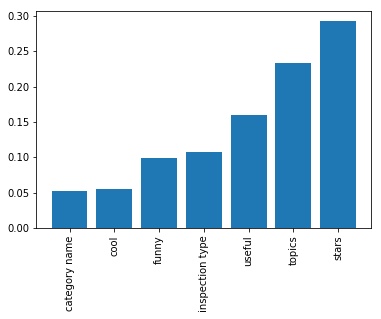

In [378]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
acc = clf.predict(final2.drop(model_drop, axis = 1)) ==  np.array(final2['inspection grade'])
print(Counter(acc)[True] / (Counter(acc)[True] + Counter(acc)[False]))
feat_dict = dict(zip(x_train.drop(model_drop,axis = 1).columns,clf.feature_importances_))
features = pd.DataFrame(pd.Series(feat_dict),columns=['feature_importance'])
sortd= features.sort_values(by=['feature_importance'])
sortd

plt.bar(range(len(sortd)), sortd['feature_importance'], align='center')
plt.xticks(range(len(sortd)), sortd.index,rotation = 'vertical')

sortd
print(print(accuracy_score(clf.predict(final2.drop(model_drop, axis = 1)),final2['inspection grade'])))

In [379]:
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression
# logreg = linear_model.LogisticRegression()
# logreg.fit(x_train, y_train)
# preds = logreg.predict(x_test)

In [380]:
# acc = logreg.predict(x_test) ==  np.array(y_test)
# print(Counter(acc)[True] / (Counter(acc)[True] + Counter(acc)[False]))

In [381]:
# truth_count = 0
# false_count = 0
# for i in range(len(preds)):
#     if preds[i] == y_test.iloc[i]:
#         truth_count+=1
#     else:
#         false_count+=1
    

# print(truth_count)
# print(false_count)